In [15]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations

In [148]:
data = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20141101_20141130.nc')
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
bathymetry = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc', 'r')
meshgrid = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc', 'r')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
thalweg = np.loadtxt('/home/sallen/MEOPAR/tools/bathymetry/thalweg_working.txt')

In [22]:
imin, imax = 300, 400
jmin, jmax = 240, 340
iibp, jjbp = 343, 289

Depth at BP point 226.75


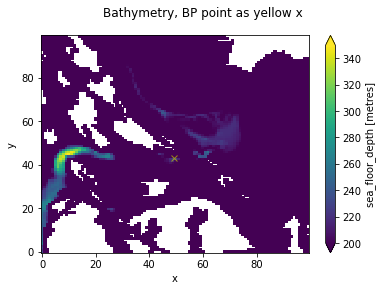

In [194]:
fig, ax = plt.subplots(1, 1)
bathy.Bathymetry[imin:imax, jmin:jmax].plot(ax=ax, vmin=200, vmax=350);
ax.plot(jjbp-jmin, iibp-imin, 'xy', alpha=0.7);
print (f'Depth at BP point {bathy.Bathymetry[iibp, jjbp].values}')
fig.suptitle('Bathymetry, BP point as yellow x');

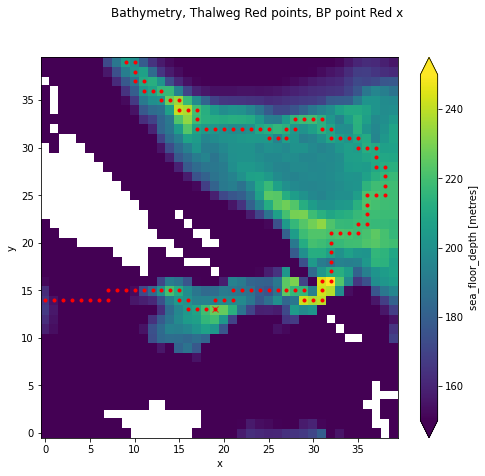

In [195]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
bathy.Bathymetry[imin+30:imax-30, jmin+30:jmax-30].plot(ax=ax, vmin=150, vmax=250);
ax.plot(jjbp-(jmin+30), iibp-(imin+30), 'rx', alpha=0.7);
ax.plot(thalweg[:, 1]-(jmin+30), thalweg[:, 0]-(imin+30), 'r.')
fig.suptitle('Bathymetry, Thalweg Red points, BP point Red x');

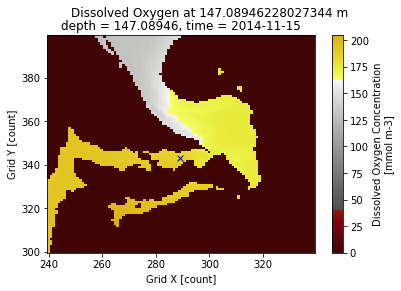

In [199]:
kk = 28
fig, ax = plt.subplots(1, 1)
data.dissolved_oxygen[0, kk, imin:imax, jmin:jmax].plot(ax=ax, cmap=cm.oxy);
ax.plot(jjbp, iibp, 'xb')#, alpha=0.7);
fig.suptitle(f'Dissolved Oxygen at {data.depth[kk].values} m');

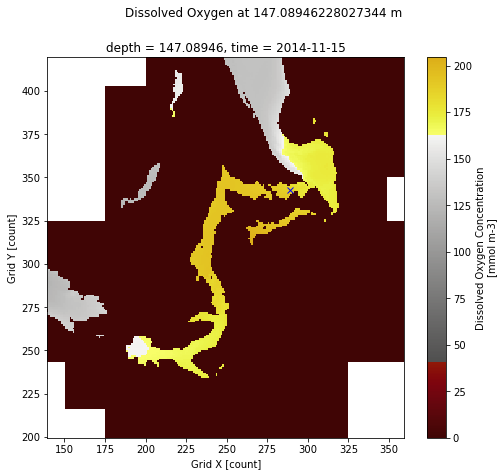

In [198]:
kk = 28
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
data.dissolved_oxygen[0, kk, imin-100:imax+20, jmin-100:jmax+20].plot(ax=ax, cmap=cm.oxy);
ax.plot(jjbp, iibp, 'xb')#, alpha=0.7);
fig.suptitle(f'Dissolved Oxygen at {data.depth[kk].values} m');

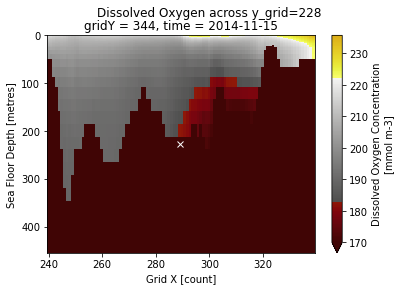

In [200]:
fig, ax = plt.subplots(1, 1)
data.dissolved_oxygen[0, :, iibp+1, jmin:jmax].plot(ax=ax, yincrease=False, cmap=cm.oxy, vmin=170);
ax.plot(jjbp, 228, 'wx');
fig.suptitle(f'Dissolved Oxygen across y_grid=228');

In [203]:
def make_the_plot(sal2017, oxy2014, cmap, outfile, clevels, label, size=200):

    fig, axs = plt.subplots(2, 1, figsize=(15, 11))
    cbar = visualisations.contour_thalweg(axs[0], sal2017, bathymetry, meshgrid, 
                                   clevels=[30, 30.1, 30.2, 30.3, 30.4, 30.5, 
                                            30.6, 30.7, 30.8, 30.9, 31], cmap=cmap,
                                  xcoord_distance=False)
    cbar.set_label(label=label)
    cbar = visualisations.contour_thalweg(axs[1], oxy2014, bathymetry, meshgrid, 
                                   clevels=[170, 175, 180, 185, 190, 195, 
                                            200, 205, 210, 215, 220, 225], cmap=cm.oxy,
                                  xcoord_distance=False)

    for ax in axs:
        ax.set_ylim(450, 0)
        ax.set_xlim(588-size, 588+size)
    axs[0].plot(588, 225, 'xr');
    axs[1].plot(588, 225, 'xb');
    axs[0].set_title(f'Salinity along the Thalweg');
    axs[1].set_title(f'Dissolved Oxygen along the Thalweg');

    return fig, axs

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


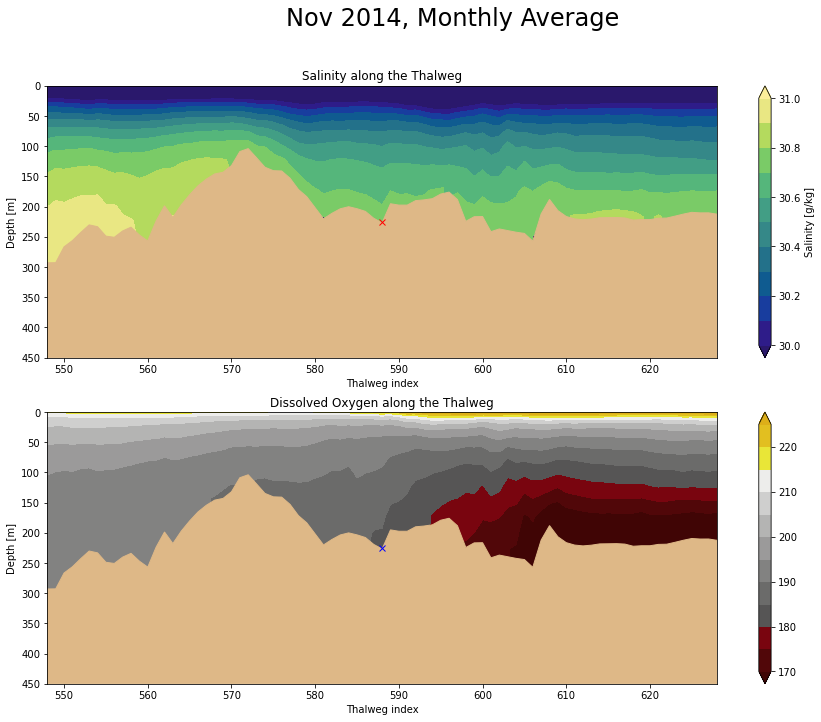

In [205]:
fT2017 = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20141101_20141130.nc')
sal2017 = fT2017.variables['vosaline'][0,:]

m = sal2017 == 0
sal2017 = np.ma.array(sal2017,mask=m)
cmap = cm.haline
label = 'Salinity [g/kg]'
oxy2014 = np.ma.array(data.variables['dissolved_oxygen'][0, :], mask=m)
fig, axs = make_the_plot(sal2017, oxy2014, cmap, outfile, clevels, label, size=40)
fig.suptitle('Nov 2014, Monthly Average', fontsize=24);

In [45]:
print (iibp, jjbp)
thalweg[588, 0], thalweg[588, 1]

343 289


(343.0, 289.0)

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


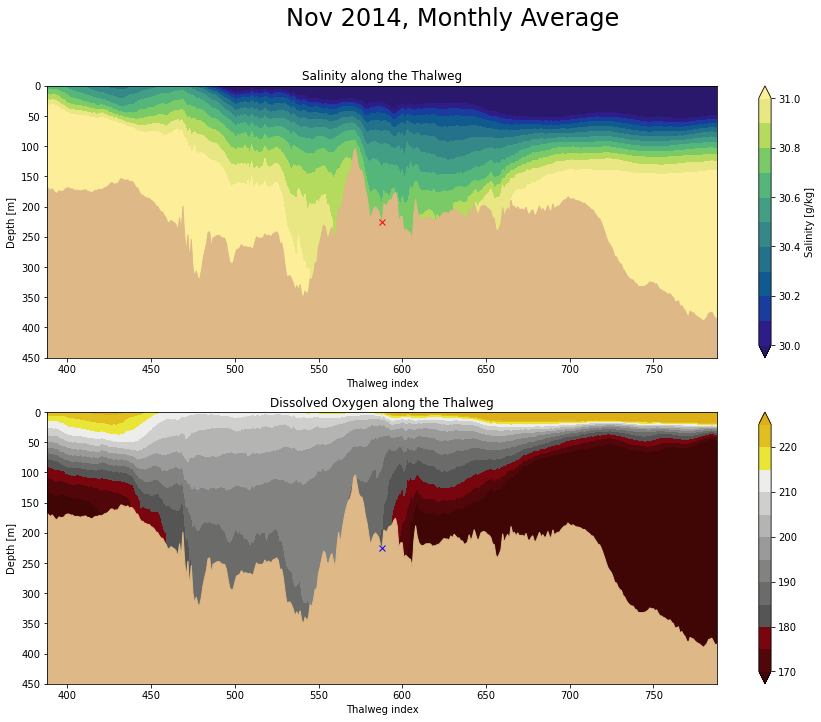

In [206]:
fT2017 = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20141101_20141130.nc')
sal2017 = fT2017.variables['vosaline'][0,:]

m = sal2017 == 0
sal2017 = np.ma.array(sal2017,mask=m)
cmap = cm.haline
label = 'Salinity [g/kg]'
oxy2014 = np.ma.array(data.variables['dissolved_oxygen'][0, :], mask=m)
fig, axs = make_the_plot(sal2017, oxy2014, cmap, outfile, clevels, label)
fig.suptitle('Nov 2014, Monthly Average', fontsize=24);

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


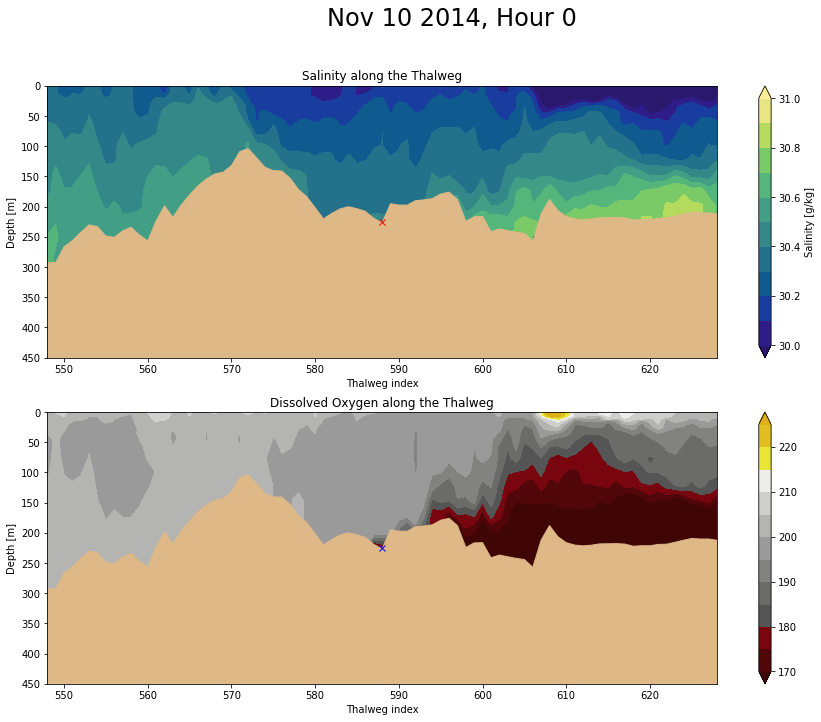

In [209]:
# 10th of November 2014
ymd = '20141110'
mdir = '10nov14'
hr = 0
salinity = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc').variables
            ['vosaline'][hr, :])
m = salinity == 0
salinity = np.ma.array(salinity, mask=m)
oxygen = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc').variables
            ['dissolved_oxygen'][hr, :])
oxygen = np.ma.array(oxygen, mask=m)

fig, axs = make_the_plot(salinity, oxygen, cm.haline, outfile, clevels, 'Salinity [g/kg]', size=40)
fig.suptitle(f'Nov 10 2014, Hour {hr}', fontsize=24);

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


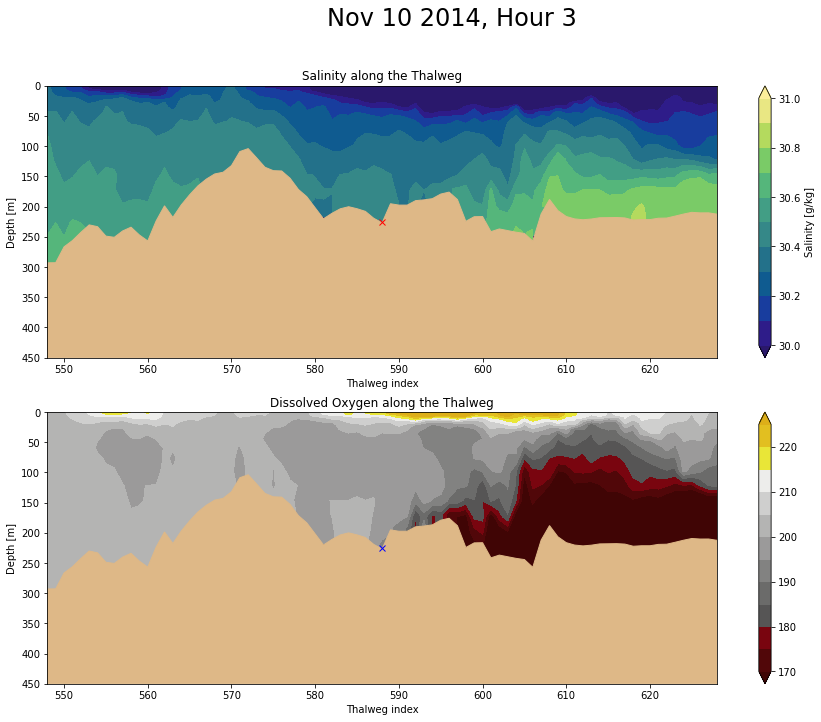

In [210]:
# 10th of November 2014
ymd = '20141110'
mdir = '10nov14'
hr = 3
salinity = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc').variables
            ['vosaline'][hr, :])
m = salinity == 0
salinity = np.ma.array(salinity, mask=m)
oxygen = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc').variables
            ['dissolved_oxygen'][hr, :])
oxygen = np.ma.array(oxygen, mask=m)

fig, axs = make_the_plot(salinity, oxygen, cm.haline, outfile, clevels, 'Salinity [g/kg]', size=40)
fig.suptitle(f'Nov 10 2014, Hour {hr}', fontsize=24);

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


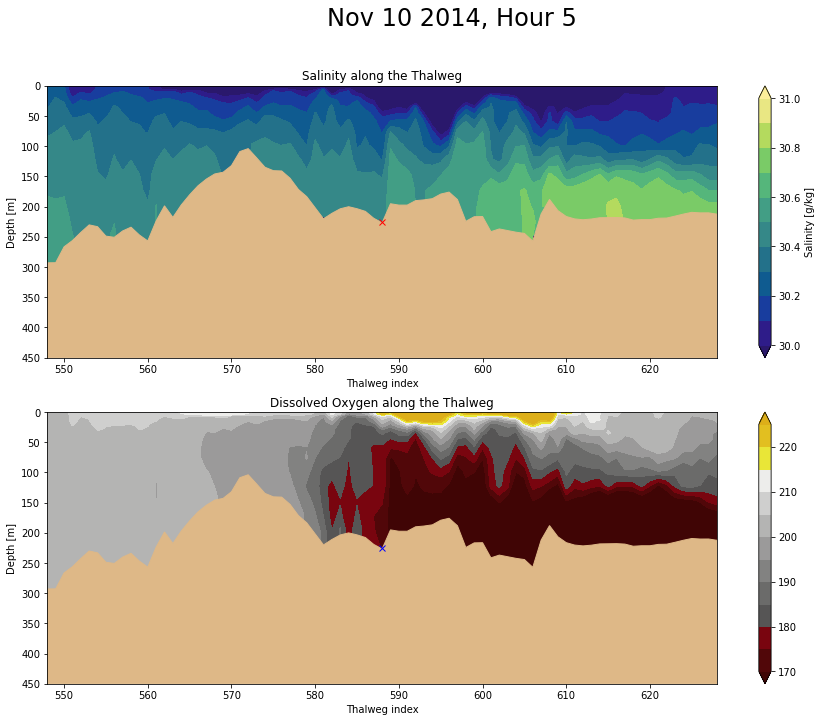

In [211]:
# 10th of November 2014
ymd = '20141110'
mdir = '10nov14'
hr = 5
salinity = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc').variables
            ['vosaline'][hr, :])
m = salinity == 0
salinity = np.ma.array(salinity, mask=m)
oxygen = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc').variables
            ['dissolved_oxygen'][hr, :])
oxygen = np.ma.array(oxygen, mask=m)

fig, axs = make_the_plot(salinity, oxygen, cm.haline, outfile, clevels, 'Salinity [g/kg]', size=40)
fig.suptitle(f'Nov 10 2014, Hour {hr}', fontsize=24);

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


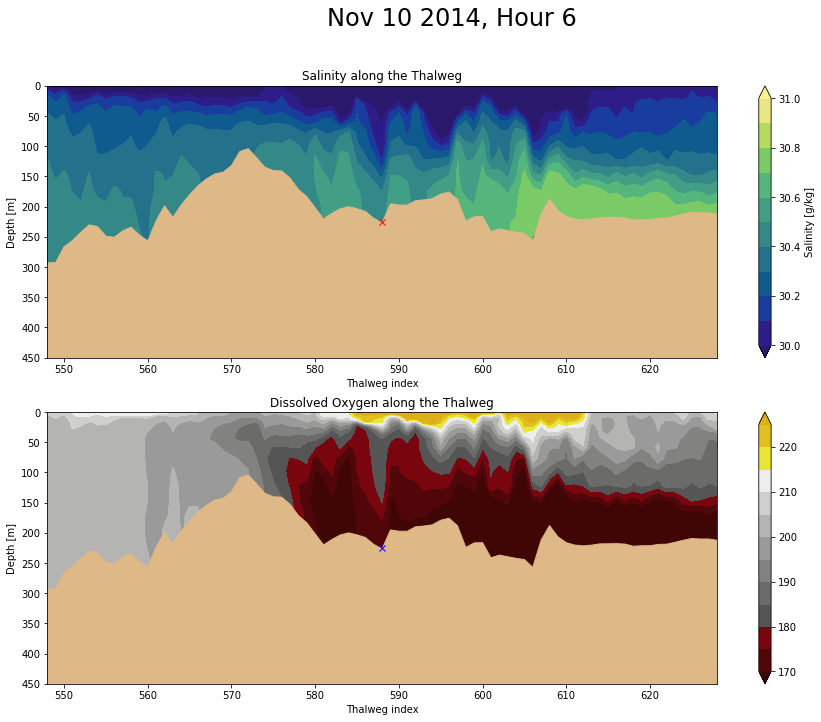

In [212]:
# 10th of November 2014
ymd = '20141110'
mdir = '10nov14'
hr = 6
salinity = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc').variables
            ['vosaline'][hr, :])
m = salinity == 0
salinity = np.ma.array(salinity, mask=m)
oxygen = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc').variables
            ['dissolved_oxygen'][hr, :])
oxygen = np.ma.array(oxygen, mask=m)

fig, axs = make_the_plot(salinity, oxygen, cm.haline, outfile, clevels, 'Salinity [g/kg]', size=40)
fig.suptitle(f'Nov 10 2014, Hour {hr}', fontsize=24);

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


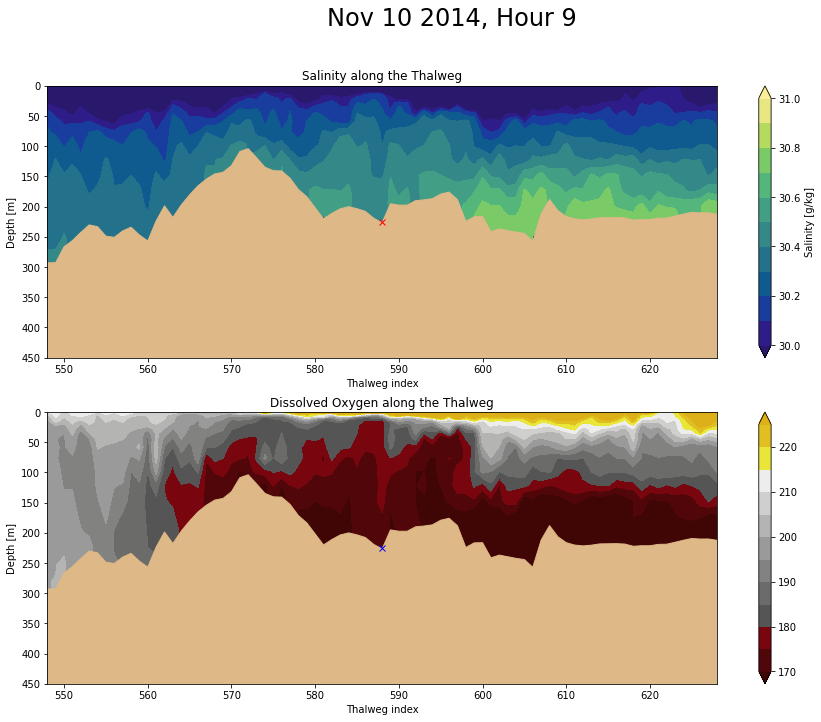

In [213]:
# 10th of November 2014
ymd = '20141110'
mdir = '10nov14'
hr = 9
salinity = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc').variables
            ['vosaline'][hr, :])
m = salinity == 0
salinity = np.ma.array(salinity, mask=m)
oxygen = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc').variables
            ['dissolved_oxygen'][hr, :])
oxygen = np.ma.array(oxygen, mask=m)

fig, axs = make_the_plot(salinity, oxygen, cm.haline, outfile, clevels, 'Salinity [g/kg]', size=40)
fig.suptitle(f'Nov 10 2014, Hour {hr}', fontsize=24);

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


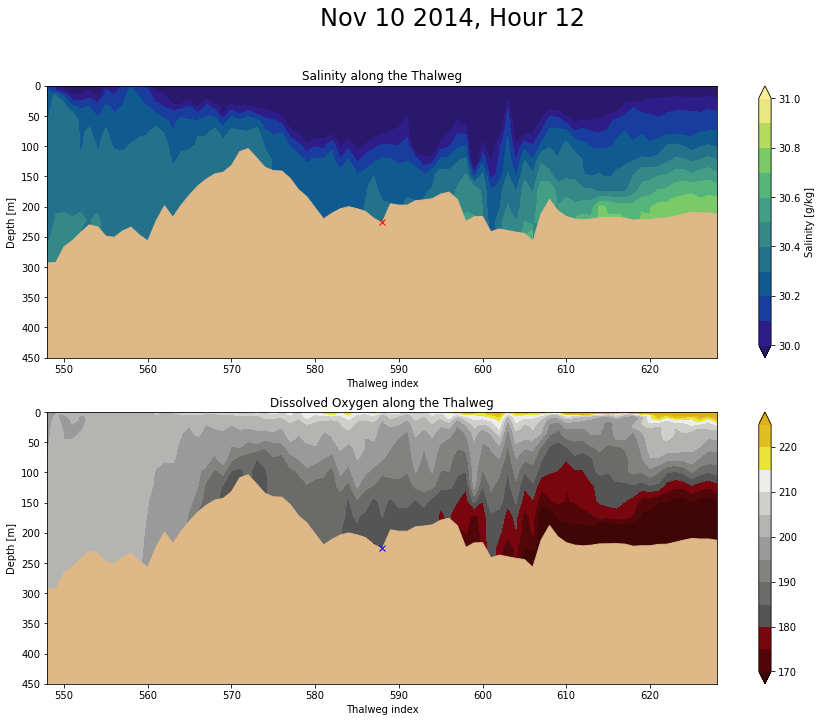

In [216]:
# 10th of November 2014
ymd = '20141110'
mdir = '10nov14'
hr = 12
salinity = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc').variables
            ['vosaline'][hr, :])
m = salinity == 0
salinity = np.ma.array(salinity, mask=m)
oxygen = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc').variables
            ['dissolved_oxygen'][hr, :])
oxygen = np.ma.array(oxygen, mask=m)

fig, axs = make_the_plot(salinity, oxygen, cm.haline, outfile, clevels, 'Salinity [g/kg]', size=40)
fig.suptitle(f'Nov 10 2014, Hour {hr}', fontsize=24);

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


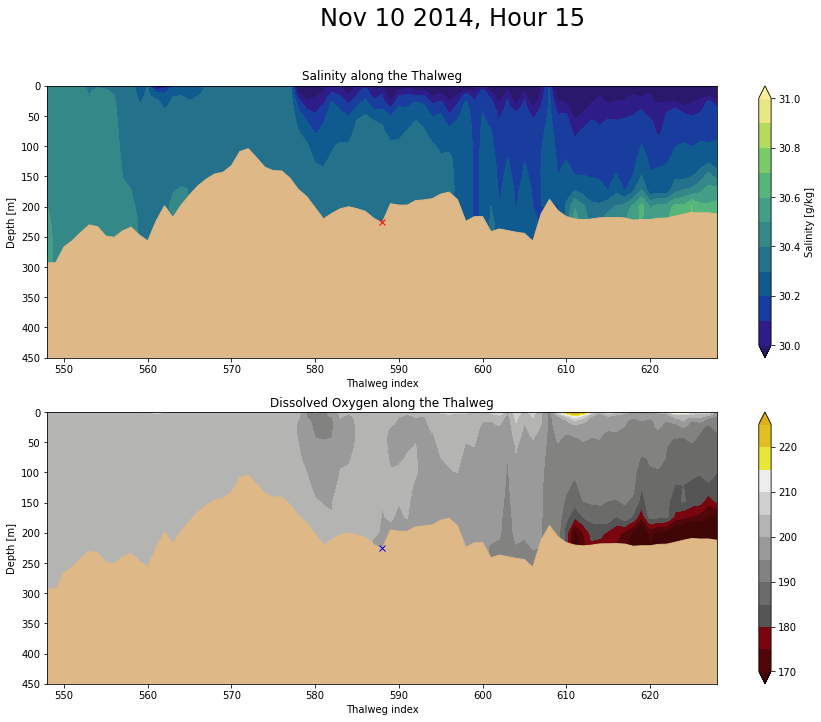

In [214]:
# 10th of November 2014
ymd = '20141110'
mdir = '10nov14'
hr = 15
salinity = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc').variables
            ['vosaline'][hr, :])
m = salinity == 0
salinity = np.ma.array(salinity, mask=m)
oxygen = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc').variables
            ['dissolved_oxygen'][hr, :])
oxygen = np.ma.array(oxygen, mask=m)

fig, axs = make_the_plot(salinity, oxygen, cm.haline, outfile, clevels, 'Salinity [g/kg]', size=40)
fig.suptitle(f'Nov 10 2014, Hour {hr}', fontsize=24);

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


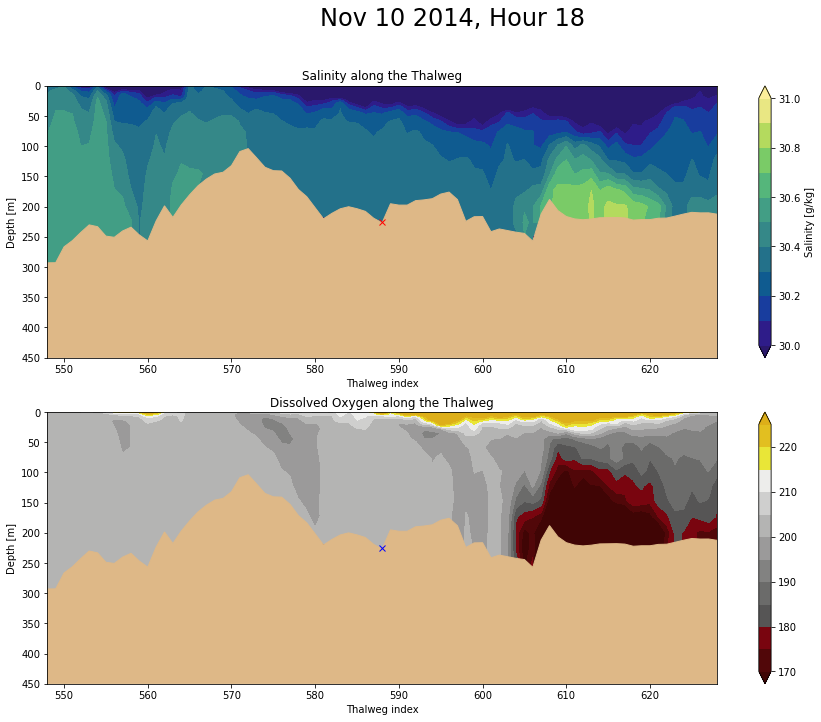

In [217]:
# 10th of November 2014
ymd = '20141110'
mdir = '10nov14'
hr = 18
salinity = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc').variables
            ['vosaline'][hr, :])
m = salinity == 0
salinity = np.ma.array(salinity, mask=m)
oxygen = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc').variables
            ['dissolved_oxygen'][hr, :])
oxygen = np.ma.array(oxygen, mask=m)

fig, axs = make_the_plot(salinity, oxygen, cm.haline, outfile, clevels, 'Salinity [g/kg]', size=40)
fig.suptitle(f'Nov 10 2014, Hour {hr}', fontsize=24);

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:255: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level - 1, i]


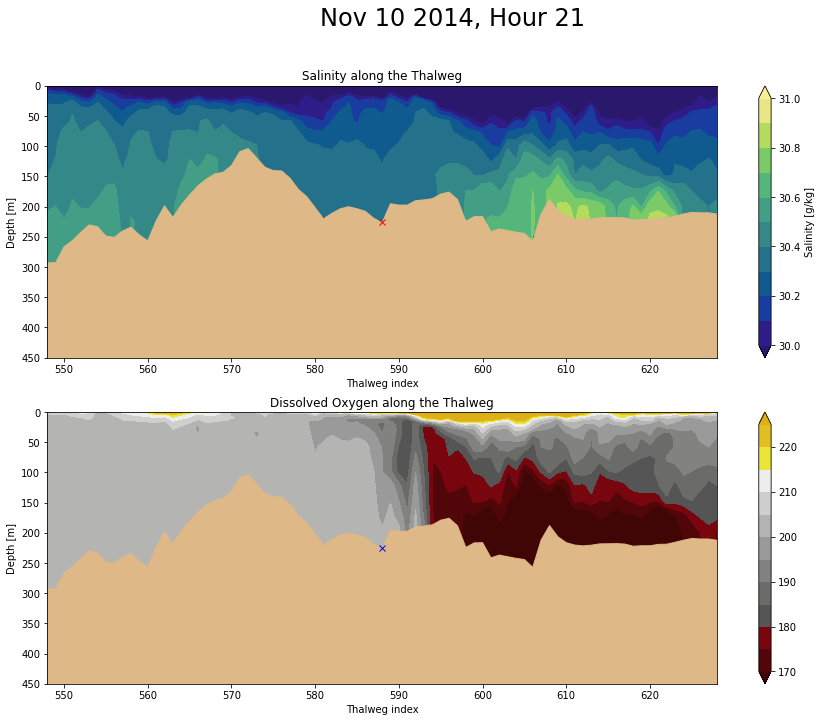

In [215]:
# 10th of November 2014
ymd = '20141110'
mdir = '10nov14'
hr = 21
salinity = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc').variables
            ['vosaline'][hr, :])
m = salinity == 0
salinity = np.ma.array(salinity, mask=m)
oxygen = (xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc').variables
            ['dissolved_oxygen'][hr, :])
oxygen = np.ma.array(oxygen, mask=m)

fig, axs = make_the_plot(salinity, oxygen, cm.haline, outfile, clevels, 'Salinity [g/kg]', size=40)
fig.suptitle(f'Nov 10 2014, Hour {hr}', fontsize=24);

In [218]:
oxy = xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc')
mix = xr.open_dataset(
        f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_W.nc')

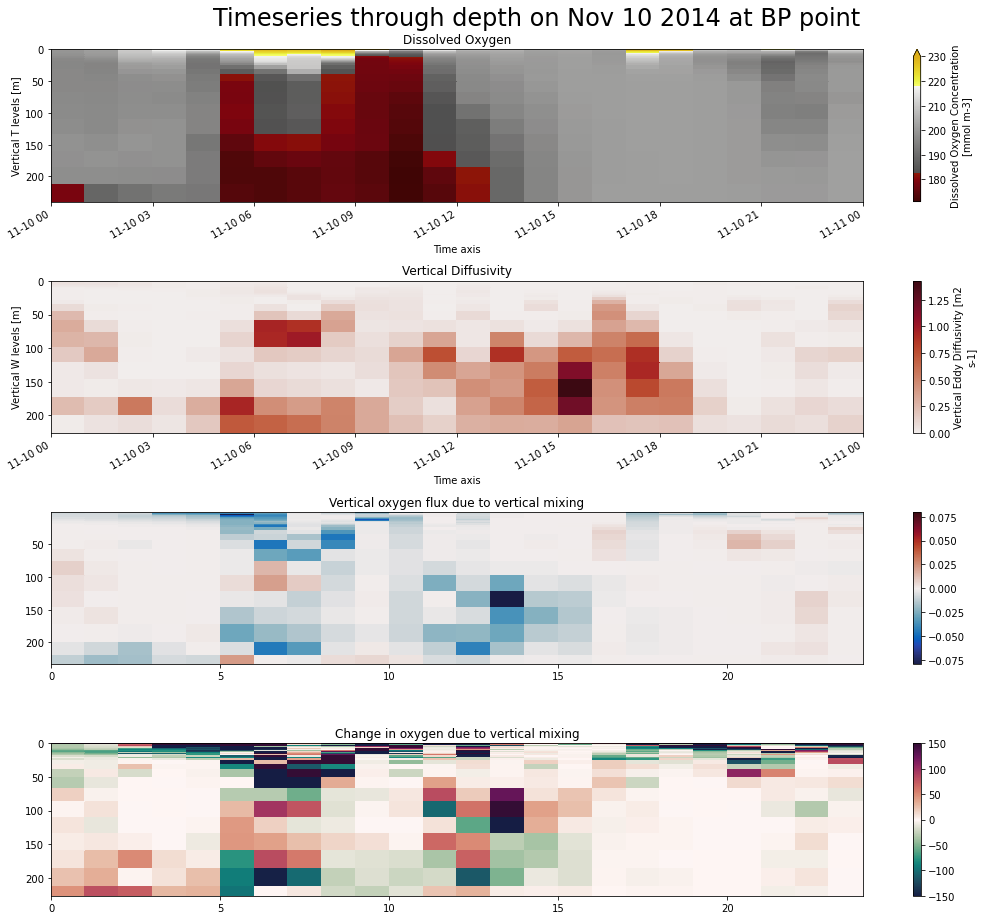

In [224]:
fig, axs = plt.subplots(4, 1, figsize=(15, 13))
oxy.dissolved_oxygen[:, :32, iibp, jjbp].plot(ax=axs[0], cmap=cm.oxy, y='deptht', x='time_centered',
                                             yincrease=False, vmax=230);
mix.vert_eddy_diff[:, :32, iibp, jjbp].plot(ax=axs[1], y='depthw', x='time_centered', yincrease=False,
                                           cmap=cm.amp);
# oxy_flux = -k dO/dz
oxy_flux = np.zeros((24, 32))
oxy_flux[:, 0] = 0 # no turbulent flux through the surface
oxy_flux[:, 1:] = - np.array(mix.vert_eddy_diff[:, 1:32, iibp, jjbp]) * (np.array(
            oxy.dissolved_oxygen[:, 0:31, iibp, jjbp]) 
            - np.array(oxy.dissolved_oxygen[:, 1:32, iibp, jjbp])) / np.array(
    mesh.e3t_0[0, 0:31, iibp, jjbp])
tt, yy = np.meshgrid(np.arange(24+1), np.array(
    mesh.gdept_0[0, 0:32+1, iibp, jjbp]))

colours = axs[2].pcolormesh(tt, yy, oxy_flux.transpose(), cmap=cm.balance, vmax=0.08, vmin=-0.08)
axs[2].invert_yaxis()
fig.colorbar(colours, ax=axs[2]);

# oxy_impact = - d/dz(-k dO/dz)
oxy_mix_impact = np.zeros((24, 32))
oxy_mix_impact[:, 0] = - oxy_flux[:, 0]/ np.array(mesh.e3w_0[0, 0, iibp, jjbp])
oxy_mix_impact[:, 0:31] = (- oxy_flux[:, 1:32] + oxy_flux[:, 0:31]) / np.array(
    mesh.e3w_0[0, 0:31, iibp, jjbp])
oxy_mix_impact[:, 31] = - oxy_flux[:, 31] / np.array(mesh.e3w_0[0, 31, iibp, jjbp])
oxy_mix_impact = oxy_mix_impact * 86400. # change units to days

tt, yy = np.meshgrid(np.arange(24+1), mesh.gdepw_0[0, 0:32+1, iibp, jjbp].values)
colours = axs[3].pcolormesh(tt, yy, oxy_mix_impact.transpose(), cmap=cm.curl, vmax=150, vmin=-150)
axs[3].invert_yaxis()
fig.colorbar(colours, ax=axs[3]);

fig.suptitle(f'Timeseries through depth on Nov 10 2014 at BP point', fontsize=24);
axs[0].set_title('Dissolved Oxygen')
axs[1].set_title('Vertical Diffusivity')
axs[2].set_title('Vertical oxygen flux due to vertical mixing')
axs[3].set_title('Change in oxygen due to vertical mixing');
fig.tight_layout();

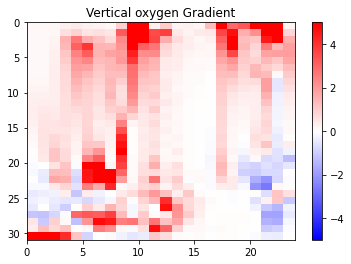

In [221]:
fig, ax = plt.subplots(1, 1)
colours = ax.pcolormesh((np.array(
            oxy.dissolved_oxygen[:, 0:31, iibp, jjbp]) 
            - np.array(oxy.dissolved_oxygen[:, 1:32, iibp, jjbp])).transpose(), cmap='bwr', vmax=5, vmin=-5)
ax.invert_yaxis();
fig.colorbar(colours);
ax.set_title('Vertical oxygen Gradient');

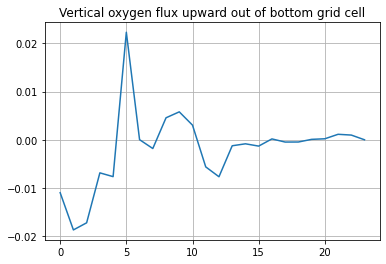

In [225]:
plt.plot(oxy_flux[:, -1]);
plt.grid();
plt.title('Vertical oxygen flux upward out of bottom grid cell');

Mean of change in oxygen in bottom grid cell over Nov 10, 2014 7.608997596421902


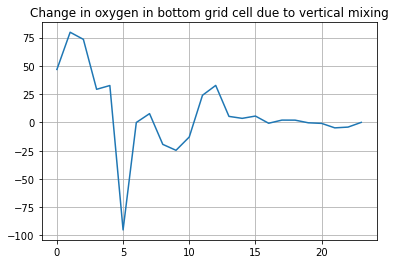

In [226]:
plt.plot(oxy_mix_impact[:, -1]);
plt.grid();
plt.title('Change in oxygen in bottom grid cell due to vertical mixing')
print (f'Mean of change in oxygen in bottom grid cell over Nov 10, 2014 {oxy_mix_impact[:, -1].mean(axis=0)}')

In [154]:
mesh.gdept_0[0, :32, iibp, jjbp]
mesh.e3t_0[0, :32, iibp, jjbp]
mesh.gdepw_0[0, :32, iibp, jjbp]
mesh.e3w_0[0, :32, iibp, jjbp]

<xarray.DataArray 'e3w_0' (z: 32)>
array([ 1.      ,  1.000003,  1.000008,  1.000019,  1.000039,  1.000079,
        1.000156,  1.000307,  1.000602,  1.001174,  1.00229 ,  1.004463,
        1.008694,  1.016931,  1.032959,  1.06412 ,  1.1246  ,  1.24159 ,
        1.466437,  1.893272,  2.684857,  4.091313,  6.409889,  9.797678,
       13.966609, 18.13554 , 21.523329, 23.841905, 25.248361, 26.039946,
       26.46678 , 20.255744])
Dimensions without coordinates: z
Attributes:
    standard_name:  e3w_0
    long_name:      grid spacing on W-grid in w direction
    units:          m

In [170]:
mesh.gdept_0[1:32+1].values

array([], shape=(0, 40, 898, 398), dtype=float32)